In [1]:
import pandas as pd
import numpy as np

# Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
from varname import nameof

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

### Клиенты телекоммуникационной компании 

У вас есть набор данных от некой телекоммуникационной компании. Данные содержат информацию о пользователях компании, их демографических характеристиках, услугах, которыми они пользуются, продолжительности пользования услугами компании, способе оплаты и размере оплаты.

Задача состоит в том, чтобы проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые будут и не будут продлевать свой контракт с компанией).


Gender - пол (male / female) <br>
Senior - пенсионер или нет (1, 0)<br>
Married - состоит ли в браке (Yes, No) <br>
Tenure - сколько месяцев человек является клиентом компании<br>
Phone - подключен ли телефон (Yes, No)<br>
MultiplePhone - подключено ли несколько телефонных каналов (Yes, No, No phone service)<br>
Internet - предоставляются ли услуги интернет соединения (DSL, Fiber optic, No)<br>
Security - подключен ли сервис интернет-безопасности (Yes, No, No internet service)<br>
Backup - активирована ли служба онлайн-резервного копирования (Yes, No, No internet service)<br>
Insurance - есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
Support - подключена ли служба технической поддержки (Yes, No, No internet service)<br>
TV - подключена ли служба потокового телевидения (Yes, No, No internet service)<br>
Movies - активирован ли сервис потокового кино (Yes, No, No internet service)<br>
Contract - тип клиентского контракта (Month-to-month, One year, Two year)<br>
EBilling - использует ли клиент безбумажный биллинг (Yes, No)<br>
PaymentMethod - способ оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
MonthlyCharges - текущий ежемесячный платеж<br>
TotalCharges - общая сумма, которую клиент заплатил за услуги за все время<br>
Churn - покинул ли клиент компанию (Yes or No)<br>

In [9]:
test = pd.read_csv("test.csv")
test

,Index,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Male,0,No,No,58,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Bank transfer (automatic),99.15,5720.95
1,1,Female,0,Yes,Yes,26,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.80,2361.8
2,2,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),87.15,2274.1
3,3,Male,0,No,No,12,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,67.25,832.3
4,4,Female,0,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.05,75.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,2390,Male,0,No,No,62,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),43.70,2618.3
2391,2391,Female,0,Yes,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.10,43.15
2392,2392,Female,0,Yes,Yes,23,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.75,1849.95
2393,2393,Male,1,Yes,No,53,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.90,5549.4


In [10]:
data = pd.read_csv('train.csv', index_col=0)
data.head(5)

,Gender,Senior,Married,Dependents,Tenure,Phone,MultiplePhones,Internet,Security,Backup,Insurance,Support,TV,Movies,Contract,EBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Index,,,,,,,,,,,,,,,,,,,,
0,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,False
1,Female,0,No,No,34,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Mailed check,64.40,2088.75,True
2,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),96.60,6827.5,False
3,Female,0,Yes,Yes,63,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Mailed check,63.55,4014.2,False
4,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,One year,No,Credit card (automatic),95.75,6511.25,False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

<AxesSubplot:>

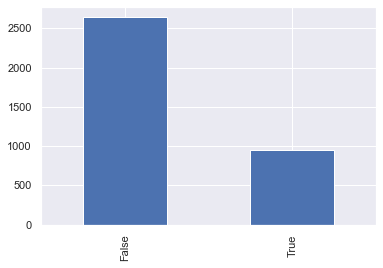

In [12]:
data['Churn'].value_counts().plot(kind='bar')

In [13]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges
Index,,,
2411,0,69,19.30
1201,0,7,69.90
3562,0,72,92.00
3017,0,42,84.30
2103,1,6,89.35


In [14]:
data.TotalCharges.value_counts().head(10)

19.55    6
         6
20.2     6
19.9     4
20.5     4
20.3     4
45.3     4
20.05    4
69.55    3
69.65    3
Name: TotalCharges, dtype: int64

In [15]:
data.TotalCharges = data.TotalCharges.replace(' ', 0).astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          3591 non-null   object 
 1   Senior          3591 non-null   int64  
 2   Married         3591 non-null   object 
 3   Dependents      3591 non-null   object 
 4   Tenure          3591 non-null   int64  
 5   Phone           3591 non-null   object 
 6   MultiplePhones  3591 non-null   object 
 7   Internet        3591 non-null   object 
 8   Security        3591 non-null   object 
 9   Backup          3591 non-null   object 
 10  Insurance       3591 non-null   object 
 11  Support         3591 non-null   object 
 12  TV              3591 non-null   object 
 13  Movies          3591 non-null   object 
 14  Contract        3591 non-null   object 
 15  EBilling        3591 non-null   object 
 16  PaymentMethod   3591 non-null   object 
 17  MonthlyCharges  3591 non-null   f

In [16]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Senior,Tenure,MonthlyCharges,TotalCharges
Index,,,,
137,0,13,19.45,270.20
700,0,1,89.90,89.90
1015,0,4,97.95,384.50
632,0,15,84.45,1287.85
3166,0,10,20.00,198.70


In [17]:
data = data.replace({'Gender': {'Female': 1, 'Male': 0}, 
                     'Married': {'Yes': 1, 'No': 0}, 
                     'Phone': {'Yes': 1, 'No': 0},
                    })

In [18]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data.sample(5)

,Gender,Senior,Married,Tenure,Phone,MonthlyCharges,TotalCharges
Index,,,,,,,
3386,1,0,1,23,0,34.60,813.45
2105,0,0,1,69,1,99.45,7007.60
1893,1,0,0,61,1,115.10,6993.65
2938,1,0,0,12,1,78.30,909.25
2045,0,0,0,3,1,45.45,141.70


<AxesSubplot:>

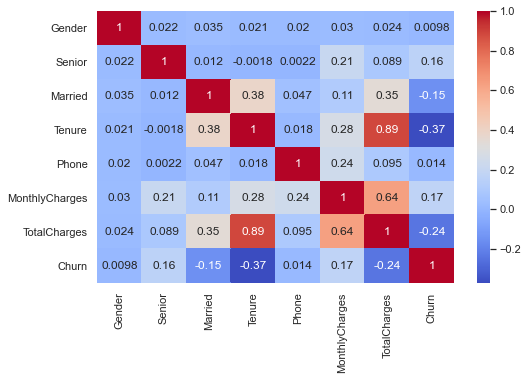

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(data[numeric_data.columns.tolist() + ['Churn']].corr(method = 'spearman'), cmap='coolwarm', annot = True)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(numeric_data, 
                                                    data.Churn,
                                                    test_size = 0.25,
                                                    random_state = 1)


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)

dummy_predictions = dummy.predict(X_train)


In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print (classification_report(Y_train, dummy_predictions))

plot_confusion_matrix(estimator=dummy, X= X_train, y_true=Y_train)

In [ ]:
print (classification_report(Y_test, dummy.predict(X_test)))

plot_confusion_matrix(estimator=dummy, X= X_test, y_true=Y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_train_predictions = dt.predict (X_train)

print('Train evaluation')
print(classification_report(Y_train, dt_train_predictions))
plot_confusion_matrix(estimator = dt, X= X_train, y_true=Y_train)


In [ ]:
from sklearn.tree import plot_tree

print (f'Tree depth: {dt.get_depth()}')
fig = plt.figure(figsize=(25, 20), dpi=200)

plot_tree(dt, filled=True, ax=fig.gca(), fontsize='small');

In [ ]:
dt_test_predictions = dt.predict (X_test)

print('Test evaluation')
print(classification_report(Y_test, dt_test_predictions))

plot_confusion_matrix(estimator = dt, X= X_test, y_true=Y_test)

In [ ]:
smart_dt = DecisionTreeClassifier(min_samples_leaf = 7, max_depth = 17).fit(X_train, Y_train)
print (f'Tree depth: {smart_dt.get_depth()}')

print('Train evaluation')
sdt_train_predictions = smart_dt.predict (X_train)
print(classification_report(Y_train, sdt_train_predictions))

print('Test evaluation')
sdt_test_predictions = smart_dt.predict (X_test)
print(classification_report(Y_test, sdt_test_predictions))


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

tree_params = {'min_samples_leaf': [5, 7, 9, 11],
               'max_depth': [12, 15, 17, 19],
               'criterion': ['gini', 'entropy']              
              }

grid = GridSearchCV(DecisionTreeClassifier(),
                    tree_params,
                    refit=True,
                    scoring='f1_macro',
                    n_jobs = -1,
                    cv=StratifiedKFold(n_splits = 5),
                    verbose=2
                   )

grid_best_model = grid.fit(X_train, Y_train)

In [ ]:
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
print('Train evaluation')
gbm_train_predictions = grid_best_model.predict (X_train)
print(classification_report(Y_train, gbm_train_predictions))

print('Test evaluation')
gbm_test_predictions = grid_best_model.predict (X_test)
print(classification_report(Y_test, gbm_test_predictions))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()

cv_lr_predictions = cross_val_predict(lr, X_train, Y_train, cv = 5, n_jobs = -1)

print('Train evaluation')
print(classification_report(Y_train, cv_lr_predictions))


In [ ]:

lr = LogisticRegression().fit(X_train, Y_train)
print('Test evaluation')
lr_test_predictions = lr.predict (X_test)
print(classification_report(Y_test, lr_test_predictions))


In [ ]:
category_data = data.select_dtypes(exclude=np.number)
category_data.sample(5)